In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
consumer_key="7GEVKXtbgBv3z8cbN4XuA8MZm"
consumer_skey="PPZwKbTBASVgGPjq5QPRHrX9Knr152mtnPGuAwMpRONwlfa7pJ"
access_token="1244888988315308034-fWW1GSPfvot2SQ5O48xJkYgJZb94x4"
access_token_key="Q0Ez2vm9IonzhuXpU69LZYubrr10wWjwajXyDi3AJGgCt"

In [3]:
authenticate= tweepy.OAuthHandler(consumer_key,consumer_skey)
authenticate.set_access_token(access_token,access_token_key)
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [13]:
posts = api.user_timeline(screen_name='BillGates', count=100, lang="en", tweet_mode="extended")


In [14]:
n=1
for tweet in posts[0:10]:
    print(str(n) +". "+ tweet.full_text + "\n")
    n+=1
    

1. One of the questions I am most often asked about the #COVID19 pandemic is how, and when, it will end. This article by @edyong209 does a really good job of outlining the steps we need to take. https://t.co/hA2JChowQS

2. This impressive new tool from @IHME_UW will help hospitals, policymakers, and the general public better understand and prepare for the #COVID19 response in the U.S. https://t.co/tTd5tEtTRc

3. This is encouraging news, but we still have a lot of work to do. Extreme physical distancing and testing are the best tools we have right now to slow the spread of novel coronavirus. https://t.co/7IHhb8CaFD

4. There are few people I’ve learned more from over the years–especially about viruses–than Peter Piot. This Q&amp;A with him is an excellent, easy-to-understand primer on #COVID19: https://t.co/dBntxKnybd https://t.co/R6M4fItYHU

5. I’ve been impressed by governors across the country including @JayInslee, @NYGovCuomo, @GavinNewsom, @GovMikeDeWine, @GovLarryHogan, and the m

In [15]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])


In [16]:
df[0:5]

,Tweets
0,One of the questions I am most often asked abo...
1,This impressive new tool from @IHME_UW will he...
2,"This is encouraging news, but we still have a ..."
3,There are few people I’ve learned more from ov...
4,I’ve been impressed by governors across the co...


In [17]:
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text, flags=re.MULTILINE)
    
    return text

In [18]:
df["Tweets"]=df["Tweets"].apply(cleantext)

In [19]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df["Tweets"].apply(getPolarity)

In [20]:
allwords = " ".join([twts for twts in df['Tweets']])
wordcloud = WordCloud(width=500,height=500, random_state=21, max_font_size=200).generate(allwords)

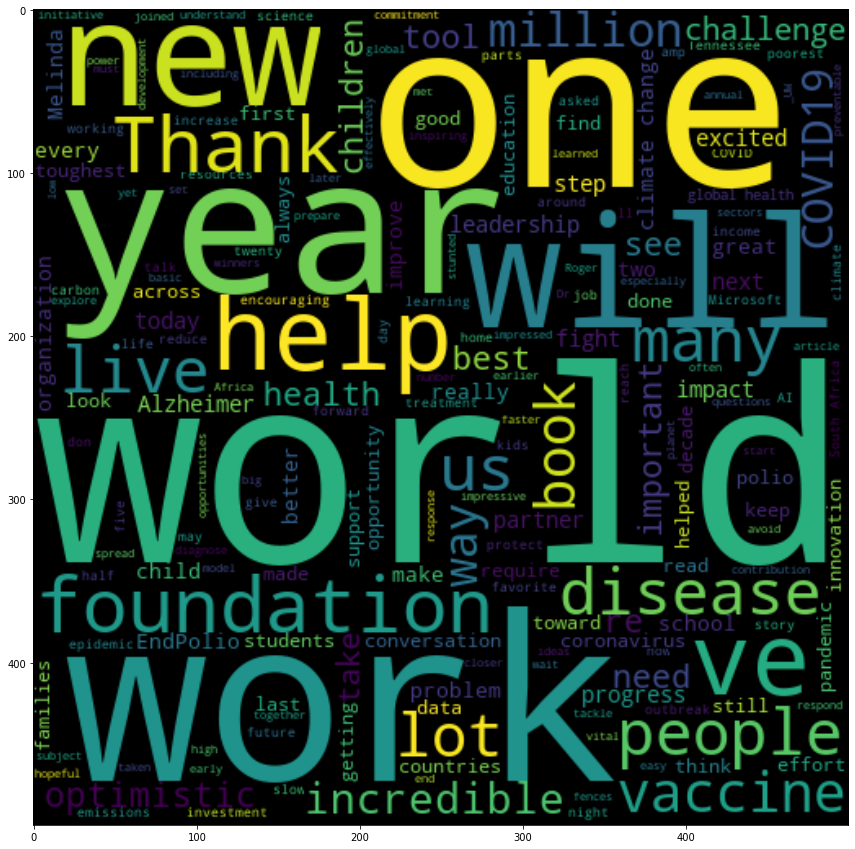

In [21]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [22]:
def getanalysis(score):
    if score>0:
        return "Positive"
    elif score == 0:
        return "Neutral"
    elif score<0:
        return "Negative"
    
df["Analysis"]=df["Polarity"].apply(getanalysis)

In [23]:
sorteddf = df.sort_values(by=['Polarity'])
for i in range(0,sorteddf.shape[0]):
    print(sorteddf["Tweets"][i]+str(sorteddf["Analysis"][i]+'\n'))

One of the questions I am most often asked about the COVID19 pandemic is how, and when, it will end. This article by  does a really good job of outlining the steps we need to take. Positive

This impressive new tool from _UW will help hospitals, policymakers, and the general public better understand and prepare for the COVID19 response in the U.S. Positive

This is encouraging news, but we still have a lot of work to do. Extreme physical distancing and testing are the best tools we have right now to slow the spread of novel coronavirus. Positive

There are few people I’ve learned more from over the years–especially about viruses–than Peter Piot. This Q&amp;A with him is an excellent, easy-to-understand primer on COVID19:  Positive

I’ve been impressed by governors across the country including , , , , , and the many others who are guiding their communities through this challenge and providing a model for us all to follow.Positive

Thanks to Norway and Prime Minister _solberg for their o

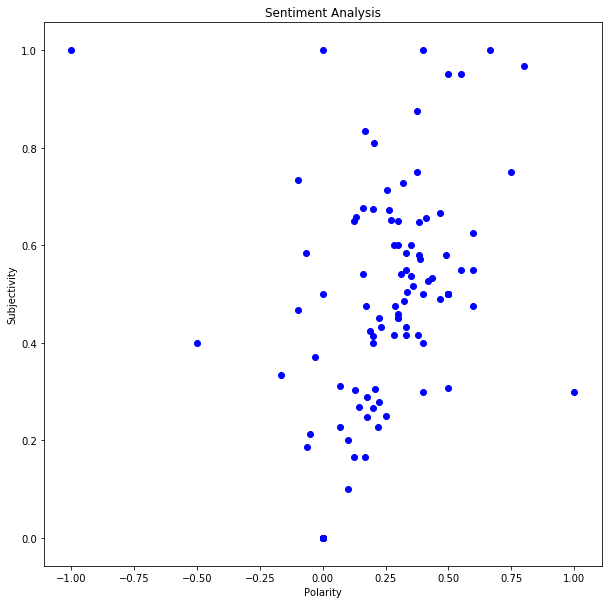

In [24]:
plt.figure(figsize=(10,10))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color='blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [25]:
ptweets = df[df["Analysis"]=='Positive']
print("Percentage of positive tweets = "+str(((ptweets.shape[0]/df.shape[0])*100))+"%")

ptweets = df[df["Analysis"]=='Negative']
print("Percentage of Negative tweets = "+str(((ptweets.shape[0]/df.shape[0])*100))+"%")

ptweets = df[df["Analysis"]=='Neutral']
print("Percentage of Neutral tweets = "+str(((ptweets.shape[0]/df.shape[0])*100))+"%")

Percentage of positive tweets = 82.0%
Percentage of Negative tweets = 9.0%
Percentage of Neutral tweets = 9.0%
